In [1]:
import scipy.io
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
from scipy.stats import zscore
from scipy.stats import ttest_ind

In [164]:
df_6 = pd.read_pickle('fitted_pyddm_cb_6_test')
print(df_6.describe())

         subjects        age      drift   boundary        tau     nondec  \
count   88.000000  88.000000  88.000000  88.000000  88.000000  88.000000   
mean    55.534091   0.511364   0.643987   1.797362   1.206509   0.456494   
std     26.955881   0.502735   0.302091   1.651188   0.553493   0.164318   
min      9.000000   0.000000   0.014819   0.600860   0.213500   0.013178   
25%     32.750000   0.000000   0.390988   0.859124   0.783240   0.416030   
50%     55.000000   1.000000   0.639124   1.027980   1.100823   0.486911   
75%     79.250000   1.000000   0.842997   1.534027   1.526972   0.539964   
max    101.000000   1.000000   1.547117   6.000000   2.663414   1.074636   

              fit  
count   88.000000  
mean   248.028054  
std    155.105314  
min    -80.538737  
25%    135.612655  
50%    243.957808  
75%    346.671878  
max    658.737371  


In [172]:
df_9 = pd.read_pickle('fitted_pyddm_cb_9_test')
print(df_9.describe())

         subjects        age      drift   boundary        tau  startbias  \
count   84.000000  84.000000  84.000000  84.000000  84.000000  84.000000   
mean    55.928571   0.500000   0.676282   1.842724   1.250600   0.023294   
std     27.505437   0.503003   0.308703   1.652850   0.604880   0.036794   
min      9.000000   0.000000   0.022505   0.616976   0.294909  -0.077462   
25%     31.750000   0.000000   0.424762   0.877500   0.821880   0.005574   
50%     57.500000   0.500000   0.670657   1.015000   1.127484   0.022599   
75%     80.250000   1.000000   0.880733   1.922500   1.576773   0.044211   
max    101.000000   1.000000   1.581629   5.990000   3.476269   0.128654   

          nondec         fit  
count  84.000000   84.000000  
mean    0.458852  254.113746  
std     0.160414  153.598675  
min     0.023619  -75.322691  
25%     0.369498  154.235101  
50%     0.489726  246.666016  
75%     0.551447  352.417278  
max     1.067613  663.713470  


In [168]:
df_10 = pd.read_pickle('fitted_pyddm_cb_10_test')
print(df_10.describe())

         subjects        age      drift  driftbias   boundary        tau  \
count   84.000000  84.000000  84.000000  84.000000  84.000000  84.000000   
mean    55.928571   0.500000   0.680656   0.002692   1.832093   1.242918   
std     27.505437   0.503003   0.308671   0.214929   1.604951   0.629068   
min      9.000000   0.000000   0.009932  -0.500233   0.611664   0.249969   
25%     31.750000   0.000000   0.444024  -0.136502   0.867918   0.819889   
50%     57.500000   0.500000   0.683219  -0.003370   1.025142   1.094941   
75%     80.250000   1.000000   0.903036   0.126882   1.799081   1.548011   
max    101.000000   1.000000   1.595219   0.722031   6.000000   3.578665   

       startbias     nondec         fit  
count  84.000000  84.000000   84.000000  
mean    0.022564   0.458904  257.482501  
std     0.066378   0.164211  154.061159  
min    -0.175923   0.056111  -69.558534  
25%    -0.012125   0.387836  153.642604  
50%     0.024559   0.482257  251.158953  
75%     0.056583   0.

In [122]:
df_7 = pd.read_pickle('fitted_pyddm_cb_7_test')
print(df_7.describe())

         subjects        age      drift  driftbias   boundary        tau  \
count   84.000000  84.000000  84.000000  84.000000  84.000000  84.000000   
mean    55.928571   0.500000   0.676163   0.071023   1.904541   1.263347   
std     27.505437   0.503003   0.304403   0.120996   1.710547   0.617109   
min      9.000000   0.000000   0.061418  -0.224648   0.615606   0.217714   
25%     31.750000   0.000000   0.419436  -0.008460   0.884027   0.811088   
50%     57.500000   0.500000   0.672783   0.059804   1.023436   1.157369   
75%     80.250000   1.000000   0.922410   0.155661   2.039725   1.608613   
max    101.000000   1.000000   1.572772   0.378487   6.000000   3.319042   

          nondec         fit  
count  84.000000   84.000000  
mean    0.452465  255.621733  
std     0.169150  154.223132  
min     0.038448  -75.168450  
25%     0.372277  148.779158  
50%     0.483302  253.850789  
75%     0.547981  352.411672  
max     1.075053  664.782681  


In [3]:
def age_grouping(df):
    ya_df = df.loc[df['age'] == 0]
    oa_df = df.loc[df['age'] == 1]
    print(ya_df.describe())
    print(oa_df.describe()) 
    #print(ya_df.head())
    #print(oa_df.head())
    return ya_df, oa_df

In [20]:
oa_n = 42
ya_n = 42
N = (oa_n+ya_n)/2
print(N)

42.0


In [173]:
ya_df, oa_df = age_grouping(df_9)

        subjects   age      drift   boundary        tau  startbias     nondec  \
count  42.000000  42.0  42.000000  42.000000  42.000000  42.000000  42.000000   
mean   57.738095   0.0   0.765088   2.240028   1.277856   0.029855   0.453001   
std    25.922078   0.0   0.314705   1.934620   0.603529   0.040943   0.186597   
min     9.000000   0.0   0.022505   0.690000   0.294909  -0.077462   0.023619   
25%    40.250000   0.0   0.558909   0.893241   0.878611   0.009561   0.359458   
50%    60.500000   0.0   0.768423   1.175625   1.185140   0.024371   0.481483   
75%    76.750000   0.0   0.981830   3.360000   1.601248   0.060593   0.533673   
max    98.000000   0.0   1.581629   5.990000   2.575106   0.128654   1.067613   

              fit  
count   42.000000  
mean   260.269559  
std    170.316033  
min    -75.322691  
25%    149.384029  
50%    273.098472  
75%    388.727642  
max    663.713470  
         subjects   age      drift   boundary        tau  startbias  \
count   42.000000  

In [103]:
ya_fit_df = ya_df.loc[ya_df['fit'] >= 450]
oa_fit_df = oa_df.loc[oa_df['fit'] >= 450]
print(ya_fit_df)
oa_fit_df

    subjects  age     drift  driftbias  boundary       tau  startbias  \
7         17    0  0.595155   0.058237  5.907072  1.381438   0.013358   
9         20    0  0.567781   0.025180  1.001335  0.492649   0.073823   
41        57    0  0.660488   0.011331  3.590000  1.213457   0.025613   
54        71    0  0.686595   0.004234  2.442044  1.184858   0.035959   
56        74    0  0.632978   0.182338  0.860000  0.225072  -0.040508   
58        76    0  0.156027   0.297573  5.760000  1.563085  -0.062162   
62        80    0  0.392595   0.029836  3.151718  0.925072   0.002749   
77        95    0  0.491976   0.118545  5.647480  1.415117  -0.031812   

      nondec         fit loss  
7   0.177164  467.725203  BIC  
9   0.519941  502.973026  BIC  
41  0.180021  484.355922  BIC  
54  0.310715  470.980590  BIC  
56  0.490696  502.385567  BIC  
58  0.344009  487.827432  BIC  
62  0.051918  671.192161  BIC  
77  0.198234  452.715284  BIC  


,subjects,age,drift,driftbias,boundary,tau,startbias,nondec,fit,loss
27,38,1,0.421062,0.254587,4.190000,1.480923,-0.021187,0.316231,472.975824,BIC
40,54,1,0.557582,0.026428,2.120884,1.079495,0.012838,0.357873,471.643748,BIC
45,61,1,0.680444,0.000000,1.750000,0.935844,0.031155,0.472830,483.738342,BIC
63,81,1,0.376392,0.020301,1.570000,0.810884,0.021162,0.458033,584.225158,BIC
66,84,1,0.258316,0.042860,5.349767,1.298427,-0.011445,0.233838,563.727730,BIC


In [94]:
oa_good_fit_drift = oa_fit_df['drift']
ya_good_fit_drift = ya_fit_df['drift']
print(len(oa_good_fit_drift))
len(ya_good_fit_drift)

5


9

In [96]:
N_bad_fit = (5+8)/2
print(N_bad_fit)
N_good_fit = (5+9)/2
print(N_good_fit)
N_total = (N_bad_fit + N_good_fit)/2
N_total

6.5
7.0


6.75

In [102]:
oa_good_fit_bound = oa_fit_df['boundary']
ya_good_fit_bound = ya_fit_df['boundary']

0.9190637855298893


0.9999968621467872

In [105]:
oa_bad_fit_bound = oa_fit_df['boundary']
ya_bad_fit_bound = ya_fit_df['boundary']
print(len(oa_bad_fit_bound))
len(ya_bad_fit_bound)

5


8

In [106]:
print(len(oa_good_fit_bound))
len(ya_good_fit_bound)

5


9

In [110]:
print("Good vs bad fit boundary YA", two_sample_t_test(ya_good_fit_bound,ya_bad_fit_bound, N_total))
print("Good vs bad fit boundary OA", two_sample_t_test(oa_good_fit_bound,oa_bad_fit_bound, N_total))

t = -3.173995446325828
p = 0.008409466313426288
t = -3.6767629481541344
p = 0.002243374598474189
Good vs bad fit boundary YA (-3.173995446325828, 0.008409466313426288)
t = -3.184008448486538
p = 0.008257640358541955
t = -2.740358154482684
p = 0.02543514696425729
Good vs bad fit boundary OA (-3.184008448486538, 0.008257640358541955)


In [119]:
# Create lists for the plot
fits = ['good', 'bad']
x_pos = np.arange(len(fits))
CTEs = [ya_good_fit_bound.mean(), ya_bad_fit_bound.mean()]
error = [np.std(ya_good_fit_bound), np.std(ya_bad_fit_bound)]

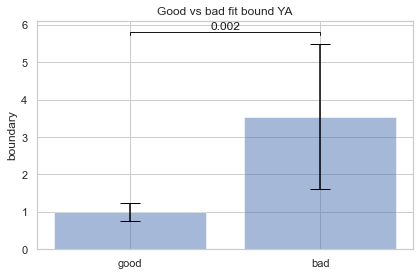

In [121]:
fig, ax = plt.subplots()
ax.bar(x_pos, CTEs, yerr=error, align='center', alpha=0.5, ecolor='black', capsize=10)
x1, x2 = 0, 1   
y, h, col = ya_bad_fit_bound.max()-0.19,0.1, 'k'
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1, c=col)
plt.text((x1+x2)*.5, y+h, '0.002', ha='center', va='bottom', color=col)
ax.set_ylabel('boundary')
ax.set_xticks(x_pos)
ax.set_xticklabels(fits)
ax.set_title('Good vs bad fit bound YA')
ax.yaxis.grid(True)


plt.tight_layout()
plt.show()

In [109]:
print("Good vs bad fit drift YA", two_sample_t_test(ya_good_fit_drift,ya_bad_fit_drift, N_total))
print("Good vs bad fit drift OA", two_sample_t_test(oa_good_fit_drift,oa_bad_fit_drift, N_total))

t = 3.366010849352729
p = 1.9940657581838195
t = 3.7023515653151047
p = 0.0021288108263133065
Good vs bad fit drift YA (3.366010849352729, 1.9940657581838195)
t = 2.1289018457093003
p = 1.9443706081828223
t = 1.8322669764760782
p = 0.10427423012613445
Good vs bad fit drift OA (2.1289018457093003, 1.9443706081828223)


In [92]:
oa_bad_fit_drift = oa_fit_df['drift']
ya_bad_fit_drift = ya_fit_df['drift']
print(len(oa_bad_fit_drift))
len(ya_bad_fit_drift)

5


8

In [170]:
ya_df.describe()

,subjects,age,drift,driftbias,boundary,tau,startbias,nondec,fit
count,42.000000,42.0,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000
mean,57.738095,0.0,0.770661,0.028432,2.243214,1.279526,0.022822,0.452177,263.934539
std,25.922078,0.0,0.312420,0.234021,1.886364,0.632679,0.077195,0.191148,170.433618
min,9.000000,0.0,0.009932,-0.500233,0.690000,0.249969,-0.175923,0.056111,-69.558534
25%,40.250000,0.0,0.579347,-0.116120,0.894077,0.886098,-0.006302,0.351216,154.164378
50%,60.500000,0.0,0.774878,0.037960,1.235314,1.162701,0.022667,0.479811,274.253270
75%,76.750000,0.0,0.958052,0.141860,3.667268,1.719463,0.054714,0.531391,392.671984
max,98.000000,0.0,1.595219,0.722031,6.000000,2.816976,0.166068,1.057907,669.797428


In [171]:
oa_df.describe()

,subjects,age,drift,driftbias,boundary,tau,startbias,nondec,fit
count,42.000000,42.0,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000
mean,54.119048,1.0,0.590652,-0.023048,1.420972,1.206310,0.022307,0.465631,251.030463
std,29.204245,0.0,0.280492,0.193372,1.144513,0.630934,0.054410,0.134008,137.534264
min,12.000000,1.0,0.078782,-0.446324,0.611664,0.455202,-0.101896,0.083440,19.064289
25%,28.250000,1.0,0.378131,-0.149736,0.836243,0.780875,-0.013199,0.409481,155.789346
50%,44.500000,1.0,0.596058,-0.037871,0.982014,1.049752,0.032667,0.490658,237.560077
75%,83.500000,1.0,0.756416,0.112345,1.334233,1.453011,0.057638,0.562186,326.724778
max,101.000000,1.0,1.130524,0.505930,5.929932,3.578665,0.129782,0.664007,584.078633


In [128]:
def two_sample_t_test(a,b, N):
    
## Calculate the Standard Deviation
#Calculate the variance to get the standard deviation

    #For unbiased max likelihood estimate we have to divide the var by N-1, and therefore the parameter ddof = 1
    var_oa = a.var(ddof=1)
    var_ya = b.var(ddof=1)

    #std deviation
    s = np.sqrt((var_oa + var_ya)/2)
    #print(s)

    

    ## Calculate the t-statistics
    t = (a.mean() - b.mean())/(s*np.sqrt(2/N))



    ## Compare with the critical t-value
    #Degrees of freedom
    df = 2*N - 2

    #p-value after comparison with the t 
    p = 1 - stats.t.cdf(t,df=df) #1- for negative t-values!


    print("t = " + str(t))
    print("p = " + str(2*p))
  


    ## Cross Checking with the internal scipy function
    t2, p2 = stats.ttest_ind(a,b)
    print("t = " + str(t2))
    print("p = " + str(p2))
    return t, 2*p

In [176]:
N

42.0

In [175]:
print("Drift", two_sample_t_test(ya_df['drift'],oa_df['drift'], N))
print("Boundary", two_sample_t_test(ya_df['boundary'],oa_df['boundary'], N))
print("IC Bias", two_sample_t_test(ya_df['startbias'],oa_df['startbias'], N))
print("TAU", two_sample_t_test(ya_df['tau'],oa_df['tau'], N))
print("Nondectime", two_sample_t_test(ya_df['nondec'],oa_df['nondec'], N))
#print("Drift bias", two_sample_t_test(ya_df['driftbias'],oa_df['driftbias'], N))
print("FIT", two_sample_t_test(ya_df['fit'],oa_df['fit'], N))

t = 2.7378099193243832
p = 0.0075835247060032085
t = 2.7378099193243806
p = 0.007583524706003263
Drift (2.7378099193243832, 0.0075835247060032085)
t = 2.256739120523007
p = 0.026684787902144347
t = 2.2567391205230085
p = 0.026684787902144277
Boundary (2.256739120523007, 0.026684787902144347)
t = 1.651109600435112
p = 0.10254120070480477
t = 1.6511096004351102
p = 0.10254120070480512
IC Bias (1.651109600435112, 0.10254120070480477)
t = 0.4109148056357535
p = 0.6822068739402485
t = 0.4109148056357535
p = 0.6822068739402487
TAU (0.4109148056357535, 0.6822068739402485)
t = -0.3325033185362104
p = 1.259642241620635
t = -0.3325033185362104
p = 0.740357758379365
Nondectime (-0.3325033185362104, 1.259642241620635)
t = 0.36539179137717753
p = 0.7157598010277701
t = 0.36539179137718003
p = 0.7157598010277686
FIT (0.36539179137717753, 0.7157598010277701)


In [8]:
def plot_bar(df, parameter, p_val, model_type):
    
    fig, ax = plt.subplots(figsize=(8,6))

    sns.set(style="whitegrid")


    sns.barplot(x="age", y=parameter, data=df,  capsize=.1, color='lightblue') # ci="sd"
    sns.swarmplot(x="age", y=parameter, data=df, color="0", alpha=.35)
    # show the mean
    for p in ax.patches:
        h, w, x = p.get_height(), p.get_width(), p.get_x()
        xy = (x + w / 2., h / 2)
        text = f'Mean:\n{h:0.2f}'
        ax.annotate(text=text, xy=xy, ha='center', va='center')

    # statistical annotation
    x1, x2 = 0, 1   
    y, h, col = df[parameter].max()+0.09,0.09, 'k'
    plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1, c=col)
    plt.text((x1+x2)*.5, y+h, p_val, ha='center', va='bottom', color=col)
    plt.title("Simple PyDDM {} OA vs YA {}".format(model_type, parameter))
    plt.savefig('/Users/terlau/ddm_plots/{}_test1_eyemem1_{}.png'.format(model_type, parameter))
    plt.show()
    plt.close()

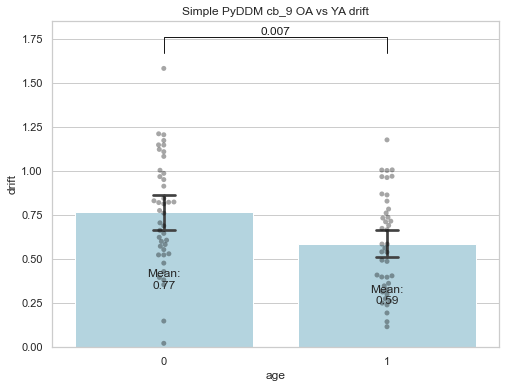

In [158]:
plot_bar(df_9, 'drift', '0.007', 'cb_9')

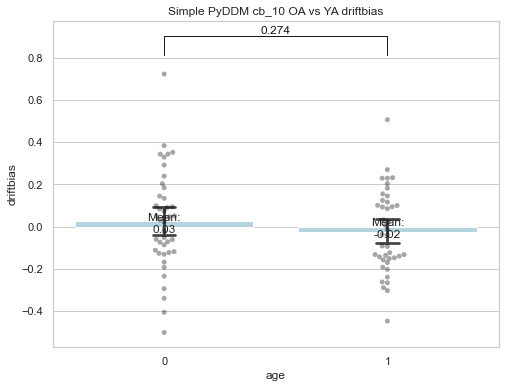

In [146]:
plot_bar(df_10, 'driftbias', '0.274', 'cb_10')

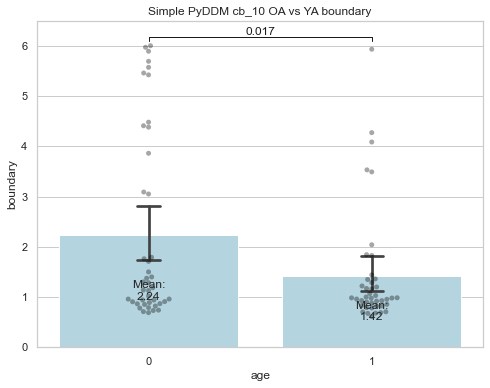

In [147]:
plot_bar(df_10, 'boundary', '0.017', 'cb_10')

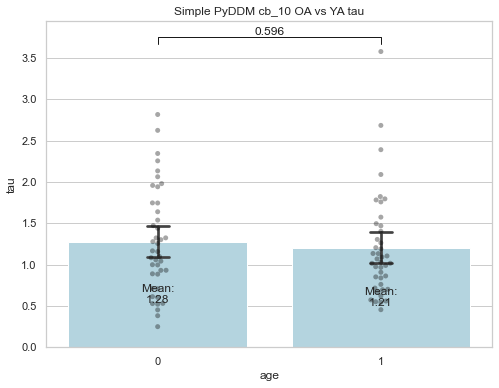

In [148]:
plot_bar(df_10, 'tau', '0.596', 'cb_10')

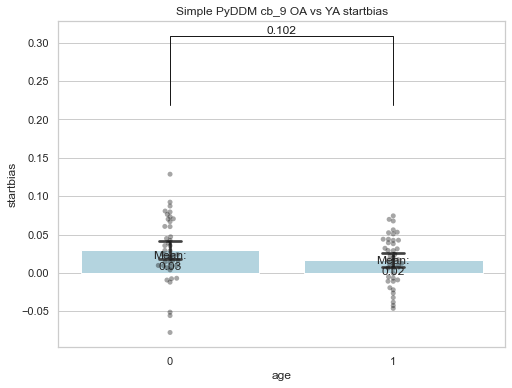

In [159]:
plot_bar(df_9, 'startbias', '0.102', 'cb_9')

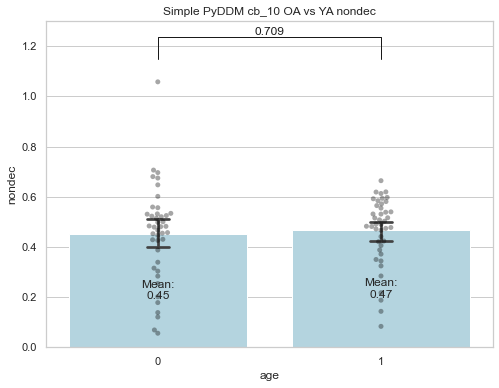

In [150]:
plot_bar(df_10, 'nondec', '0.709', 'cb_10')

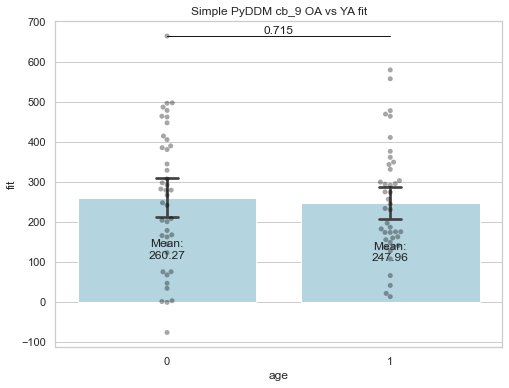

In [177]:
plot_bar(df_9, 'fit', '0.715', 'cb_9')